In [114]:
import json
import plotly.express as px
import datetime
import pandas as pd
import pickle
import os
import numpy as np
import ast
import threading
import requests
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from scipy.stats import ttest_ind
from tldextract import extract

In [115]:
pip install np_utils

Note: you may need to restart the kernel to use updated packages.


In [156]:
crawl_resuls_df = pd.read_csv('csvs/2023_08_25_top_100k_crawl_res_df.csv')

In [154]:
#crawl_resuls_df=crawl_resuls_df.drop(['init_url', 'screenshot_path'], axis=1)

In [148]:
#crawl_resuls_df = crawl_resuls_df.iloc[:, 1:]

In [155]:
#crawl_resuls_df.to_csv('csvs/2023_08_25_top_100k_crawl_res_df.csv',index=False)

In [141]:
#crawl_resuls_df.iloc[:, 1:]

,init_url,final_url,fathom_login,fathom_signup,cookie_hunter_login,cookie_hunter_signup,autofill_login,autofill_signup,screenshot_path,is_homepage,is_innerpage,ml_login,ml_signup
0,http://blog.cookaround.com/community/crea-blog...,https://blog.cookaround.com/community/crea-blo...,False,False,False,False,False,False,blog.cookaround.com_20bf.jpg,False,True,False,False
1,https://www.unegui.mn/adv/7572341_suzuki-jimny...,https://www.unegui.mn/adv/7572341_suzuki-jimny...,False,False,False,False,False,False,www.unegui.mn_a2f2.jpg,False,True,False,False
2,https://pinayot.com/#wpst-login,https://pinayot.com/#wpst-login,False,False,False,False,True,False,pinayot.com_c398.jpg,False,True,False,False
3,https://accessmedicina.mhmedical.com/cases.aspx,https://accessmedicina.mhmedical.com/cases.asp...,False,True,True,False,True,False,accessmedicina.mhmedical.com_d9bf.jpg,False,True,True,False
4,https://www.edinos.pl/zaloguj,https://www.edinos.pl/zaloguj,False,True,False,False,True,False,www.edinos.pl_e0b4.jpg,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541165,https://cl.linkedin.com/,https://cl.linkedin.com/,True,False,True,False,True,False,cl.linkedin.com_6bc8.jpg,True,False,True,False
541166,https://netatopi.jp/,https://netatopi.jp/,False,False,False,False,False,False,netatopi.jp_d2d2.jpg,True,False,False,False
541167,https://humanidades.uasd.edu.do/,https://soft.uasd.edu.do/UASDVirtualGateway/,False,True,True,False,True,False,humanidades.uasd.edu.do_952b.jpg,True,False,True,False
541168,https://www.profesionalreview.com/,https://www.profesionalreview.com/,False,False,False,False,False,False,www.profesionalreview.com_4d41.jpg,True,False,False,False


In [162]:
fps_attempts_df = pd.read_csv('csvs/2023_08_25_top_100k_fps.csv')

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (1,8,9,10,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [168]:
inner_links_df = pd.read_csv('csvs/inner_links.csv')

In [113]:
ranks = pd.read_csv("csvs/crux_fqdn_top_100k_202304_with_rank.csv")

In [6]:
# matplotlib config
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [7]:
def get_hostname(url):
    res = extract(url)
    domain = res.registered_domain
    if domain is None or domain == "":
        return res.suffix
    return domain

# Crawl Statistics:

In [8]:
TOTAL_NUM_SUCC_SITES = len(crawl_resuls_df)

In [9]:
TOTAL_NUM_HOMEPAGE_SUCC_VISITED = 94482

In [10]:
TOTAL_NUM_INNERPAGE_SUCC_VISITED = 446688

In [11]:
TOTAL_NUM_VISITED_SITES = 474436 + 98845

# Login Signup Classification Comparison

All Classifier Results

In [12]:
crawl_resuls_df.head()

,Unnamed: 0,init_url,final_url,fathom_login,fathom_signup,cookie_hunter_login,cookie_hunter_signup,autofill_login,autofill_signup,screenshot_path,is_homepage,is_innerpage,ml_login,ml_signup
0,0,http://blog.cookaround.com/community/crea-blog...,https://blog.cookaround.com/community/crea-blo...,False,False,False,False,False,False,blog.cookaround.com_20bf.jpg,False,True,False,False
1,1,https://www.unegui.mn/adv/7572341_suzuki-jimny...,https://www.unegui.mn/adv/7572341_suzuki-jimny...,False,False,False,False,False,False,www.unegui.mn_a2f2.jpg,False,True,False,False
2,2,https://pinayot.com/#wpst-login,https://pinayot.com/#wpst-login,False,False,False,False,True,False,pinayot.com_c398.jpg,False,True,False,False
3,3,https://accessmedicina.mhmedical.com/cases.aspx,https://accessmedicina.mhmedical.com/cases.asp...,False,True,True,False,True,False,accessmedicina.mhmedical.com_d9bf.jpg,False,True,True,False
4,4,https://www.edinos.pl/zaloguj,https://www.edinos.pl/zaloguj,False,True,False,False,True,False,www.edinos.pl_e0b4.jpg,False,True,False,True


Login Detection

In [13]:
print(f'Fathom detected login form {crawl_resuls_df[(crawl_resuls_df.fathom_login)].final_url.nunique()} sites.')

Fathom detected login form 52307 sites.


In [14]:
print(f'Cookie hunter heuristics detected login form on {crawl_resuls_df[(crawl_resuls_df.cookie_hunter_login)].final_url.nunique()} sites.')

Cookie hunter heuristics detected login form on 42375 sites.


In [15]:
print(f'Autofill detected login form on {crawl_resuls_df[(crawl_resuls_df.autofill_login)].final_url.nunique()} sites.')

Autofill detected login form on 91220 sites.


In [16]:
print(f'ML detected login form on homepages {crawl_resuls_df[(crawl_resuls_df.ml_login)&(crawl_resuls_df.is_homepage)].final_url.nunique()} sites.')

ML detected login form on homepages 9147 sites.


In [17]:
print(f'ML detected login form on inner pages {crawl_resuls_df[(crawl_resuls_df.ml_login)&(crawl_resuls_df.is_innerpage)].final_url.nunique()} sites.')

ML detected login form on inner pages 45032 sites.


In [18]:
crawl_resuls_df[crawl_resuls_df.ml_login].final_url.nunique()

52805

## Signup Detection

In [19]:
print(f'Fathom detected signup form on {crawl_resuls_df[(crawl_resuls_df.fathom_signup)].final_url.nunique()} sites.')

Fathom detected signup form on 138639 sites.


In [20]:
print(f'Cookie hunter heuristics detected signup form on {crawl_resuls_df[(crawl_resuls_df.cookie_hunter_signup)].final_url.nunique()} sites.')

Cookie hunter heuristics detected signup form on 17517 sites.


In [21]:
print(f'Autofill detected signup form on {crawl_resuls_df[(crawl_resuls_df.autofill_signup)].final_url.nunique()} sites.')

Autofill detected signup form on 31103 sites.


In [22]:
print(f'ML detected signup form on homepages {crawl_resuls_df[(crawl_resuls_df.ml_signup)&(crawl_resuls_df.is_homepage)].final_url.nunique()} sites.')

ML detected signup form on homepages 1523 sites.


In [23]:
print(f'ML detected signup form on inner pages {crawl_resuls_df[(crawl_resuls_df.ml_signup)&(crawl_resuls_df.is_innerpage)].final_url.nunique()} sites.')

ML detected signup form on inner pages 20684 sites.


In [24]:
crawl_resuls_df[crawl_resuls_df.ml_signup].final_url.nunique()

21988

Manual Labelling

To compare those models, I manually analyzed some samples(randomly selected 1000 sites) by checking captured screenshots.

In [25]:
manual_analysis = pd.read_csv('csvs/classifiers_comparison_random_sample.csv')

In [26]:
manual_analysis = manual_analysis[manual_analysis.label!='-']

In [27]:
def compute_f1(precision, recall):
    return 2 * precision * recall / (precision + recall)

## Cookie-Hunter Results

Data

In [28]:
manual_analysis['cookie_hunter_signup_true_positive'] = np.where((manual_analysis['cookie_hunter_signup'] == 'TRUE') & (manual_analysis['label'].isin(['b', 'r'])), True, False)
manual_analysis['cookie_hunter_signup_false_positive'] = np.where((manual_analysis['cookie_hunter_signup'] == 'TRUE') & (manual_analysis['label'].isin(['l', 'n'])), True, False)
manual_analysis['cookie_hunter_signup_false_negative'] = np.where((manual_analysis['cookie_hunter_signup'] == 'FALSE') & (manual_analysis['label'].isin(['b', 'r'])), True, False)

In [29]:

cookie_hunter_signup_precision = manual_analysis['cookie_hunter_signup_true_positive'].sum() / (manual_analysis['cookie_hunter_signup_true_positive'].sum() + manual_analysis['cookie_hunter_signup_false_positive'].sum())
cookie_hunter_signup_recall = manual_analysis['cookie_hunter_signup_true_positive'].sum() / (manual_analysis['cookie_hunter_signup_true_positive'].sum() + manual_analysis['cookie_hunter_signup_false_negative'].sum())
print("cookie_hunter signup precision: " + str(cookie_hunter_signup_precision))
print("cookie_hunter signup recall: " + str(cookie_hunter_signup_recall))
print("cookie_hunter signup f1: " + str(compute_f1(cookie_hunter_signup_precision, cookie_hunter_signup_recall)))

cookie_hunter signup precision: nan
cookie_hunter signup recall: nan
cookie_hunter signup f1: nan


<ipython-input-29-b3fc92655676>:1: RuntimeWarning: invalid value encountered in long_scalars
  cookie_hunter_signup_precision = manual_analysis['cookie_hunter_signup_true_positive'].sum() / (manual_analysis['cookie_hunter_signup_true_positive'].sum() + manual_analysis['cookie_hunter_signup_false_positive'].sum())
<ipython-input-29-b3fc92655676>:2: RuntimeWarning: invalid value encountered in long_scalars
  cookie_hunter_signup_recall = manual_analysis['cookie_hunter_signup_true_positive'].sum() / (manual_analysis['cookie_hunter_signup_true_positive'].sum() + manual_analysis['cookie_hunter_signup_false_negative'].sum())


In [30]:
manual_analysis['cookie_hunter_login_true_positive'] = np.where((manual_analysis['cookie_hunter_login'] == 'TRUE') & (manual_analysis['label'].isin(['b', 'l'])), True, False)
manual_analysis['cookie_hunter_login_false_positive'] = np.where((manual_analysis['cookie_hunter_login'] == 'TRUE') & (manual_analysis['label'].isin(['r', 'n'])), True, False)
manual_analysis['cookie_hunter_login_false_negative'] = np.where((manual_analysis['cookie_hunter_login'] == 'FALSE') & (manual_analysis['label'].isin(['b', 'l'])), True, False)

In [31]:
cookie_hunter_login_precision = manual_analysis['cookie_hunter_login_true_positive'].sum() / (manual_analysis['cookie_hunter_login_true_positive'].sum() + manual_analysis['cookie_hunter_login_false_positive'].sum())
cookie_hunter_login_recall = manual_analysis['cookie_hunter_login_true_positive'].sum() / (manual_analysis['cookie_hunter_login_true_positive'].sum() + manual_analysis['cookie_hunter_login_false_negative'].sum())
print("cookie_hunter login precision: " + str(cookie_hunter_login_precision))
print("cookie_hunter login recall: " + str(cookie_hunter_login_recall))
print("cookie_hunter login f1: " + str(compute_f1(cookie_hunter_login_precision, cookie_hunter_login_recall)))

cookie_hunter login precision: nan
cookie_hunter login recall: nan
cookie_hunter login f1: nan


<ipython-input-31-a1339134a160>:1: RuntimeWarning: invalid value encountered in long_scalars
  cookie_hunter_login_precision = manual_analysis['cookie_hunter_login_true_positive'].sum() / (manual_analysis['cookie_hunter_login_true_positive'].sum() + manual_analysis['cookie_hunter_login_false_positive'].sum())
<ipython-input-31-a1339134a160>:2: RuntimeWarning: invalid value encountered in long_scalars
  cookie_hunter_login_recall = manual_analysis['cookie_hunter_login_true_positive'].sum() / (manual_analysis['cookie_hunter_login_true_positive'].sum() + manual_analysis['cookie_hunter_login_false_negative'].sum())


In [32]:
manual_analysis['cookie_hunter_neither_true_positive'] =  np.where((((manual_analysis['cookie_hunter_login'] == 'FALSE') & (manual_analysis['label'].isin(['n'])))|((manual_analysis['cookie_hunter_signup'] == 'FALSE') & (manual_analysis['label'].isin(['n'])))), True, False)
manual_analysis['cookie_hunter_neither_false_positive'] = np.where((((manual_analysis['cookie_hunter_login'] == 'FALSE') & (manual_analysis['label'].isin(['l','b'])))|((manual_analysis['cookie_hunter_signup'] == 'FALSE') & (manual_analysis['label'].isin(['r','b'])))), True, False)
manual_analysis['cookie_hunter_neither_false_negative'] = np.where((((manual_analysis['cookie_hunter_login'] == 'TRUE') & (manual_analysis['label'].isin(['n'])))|((manual_analysis['cookie_hunter_signup'] == 'TRUE') & (manual_analysis['label'].isin(['n'])))), True, False)

In [33]:
cookie_hunter_neither_precision = manual_analysis['cookie_hunter_neither_true_positive'].sum() / (manual_analysis['cookie_hunter_neither_true_positive'].sum() + manual_analysis['cookie_hunter_neither_false_positive'].sum())
cookie_hunter_neither_recall = manual_analysis['cookie_hunter_neither_true_positive'].sum() / (manual_analysis['cookie_hunter_neither_true_positive'].sum() + manual_analysis['cookie_hunter_neither_false_negative'].sum())
print("cookie_hunter neither precision: " + str(cookie_hunter_neither_precision))
print("cookie_hunter neither recall: " + str(cookie_hunter_neither_recall))
print("cookie_hunter neither f1: " + str(compute_f1(cookie_hunter_neither_precision, cookie_hunter_neither_recall)))

cookie_hunter neither precision: nan
cookie_hunter neither recall: nan
cookie_hunter neither f1: nan


<ipython-input-33-305465064edd>:1: RuntimeWarning: invalid value encountered in long_scalars
  cookie_hunter_neither_precision = manual_analysis['cookie_hunter_neither_true_positive'].sum() / (manual_analysis['cookie_hunter_neither_true_positive'].sum() + manual_analysis['cookie_hunter_neither_false_positive'].sum())
<ipython-input-33-305465064edd>:2: RuntimeWarning: invalid value encountered in long_scalars
  cookie_hunter_neither_recall = manual_analysis['cookie_hunter_neither_true_positive'].sum() / (manual_analysis['cookie_hunter_neither_true_positive'].sum() + manual_analysis['cookie_hunter_neither_false_negative'].sum())


Fathom Results

Data

In [34]:
manual_analysis['fathom_signup_true_positive'] = np.where((manual_analysis['fathom_signup'] == 'TRUE') & (manual_analysis['label'].isin(['b', 'r'])), True, False)
manual_analysis['fathom_signup_false_positive'] = np.where((manual_analysis['fathom_signup'] == 'TRUE') & (manual_analysis['label'].isin(['l', '-', 'n'])), True, False)
manual_analysis['fathom_signup_false_negative'] = np.where((manual_analysis['fathom_signup'] == 'FALSE') & (manual_analysis['label'].isin(['b', 'r'])), True, False)

In [35]:
fathom_signup_precision = manual_analysis['fathom_signup_true_positive'].sum() / (manual_analysis['fathom_signup_true_positive'].sum() + manual_analysis['fathom_signup_false_positive'].sum())
fathom_signup_recall = manual_analysis['fathom_signup_true_positive'].sum() / (manual_analysis['fathom_signup_true_positive'].sum() + manual_analysis['fathom_signup_false_negative'].sum())
print("Fathom signup precision: " + str(fathom_signup_precision))
print("Fathom signup recall: " + str(fathom_signup_recall))
print("fathom signup f1: " + str(compute_f1(fathom_signup_precision, fathom_signup_recall)))

Fathom signup precision: nan
Fathom signup recall: nan
fathom signup f1: nan


<ipython-input-35-16f747e13f41>:1: RuntimeWarning: invalid value encountered in long_scalars
  fathom_signup_precision = manual_analysis['fathom_signup_true_positive'].sum() / (manual_analysis['fathom_signup_true_positive'].sum() + manual_analysis['fathom_signup_false_positive'].sum())
<ipython-input-35-16f747e13f41>:2: RuntimeWarning: invalid value encountered in long_scalars
  fathom_signup_recall = manual_analysis['fathom_signup_true_positive'].sum() / (manual_analysis['fathom_signup_true_positive'].sum() + manual_analysis['fathom_signup_false_negative'].sum())


In [36]:
manual_analysis['fathom_login_true_positive'] = np.where((manual_analysis['fathom_login'] == 'TRUE') & (manual_analysis['label'].isin(['b', 'l'])), True, False)
manual_analysis['fathom_login_false_positive'] = np.where((manual_analysis['fathom_login'] == 'TRUE') & (manual_analysis['label'].isin(['r', '-', 'n'])), True, False)
manual_analysis['fathom_login_false_negative'] = np.where((manual_analysis['fathom_login'] == 'FALSE') & (manual_analysis['label'].isin(['b', 'l'])), True, False)

In [37]:
fathom_login_precision = manual_analysis['fathom_login_true_positive'].sum() / (manual_analysis['fathom_login_true_positive'].sum() + manual_analysis['fathom_login_false_positive'].sum())
fathom_login_recall = manual_analysis['fathom_login_true_positive'].sum() / (manual_analysis['fathom_login_true_positive'].sum() + manual_analysis['fathom_login_false_negative'].sum())
print("Fathom login precision: " + str(fathom_login_precision))
print("Fathom login recall: " + str(fathom_login_recall))
print("fathom login f1: " + str(compute_f1(fathom_login_precision, fathom_login_recall)))

Fathom login precision: nan
Fathom login recall: nan
fathom login f1: nan


<ipython-input-37-959a8a2ece55>:1: RuntimeWarning: invalid value encountered in long_scalars
  fathom_login_precision = manual_analysis['fathom_login_true_positive'].sum() / (manual_analysis['fathom_login_true_positive'].sum() + manual_analysis['fathom_login_false_positive'].sum())
<ipython-input-37-959a8a2ece55>:2: RuntimeWarning: invalid value encountered in long_scalars
  fathom_login_recall = manual_analysis['fathom_login_true_positive'].sum() / (manual_analysis['fathom_login_true_positive'].sum() + manual_analysis['fathom_login_false_negative'].sum())


In [38]:
manual_analysis['fathom_neither_true_positive'] =  np.where((((manual_analysis['fathom_login'] == 'FALSE') & (manual_analysis['label'].isin(['n'])))|((manual_analysis['fathom_signup'] == 'FALSE') & (manual_analysis['label'].isin(['n'])))), True, False)
manual_analysis['fathom_neither_false_positive'] = np.where((((manual_analysis['fathom_login'] == 'FALSE') & (manual_analysis['label'].isin(['l','b'])))|((manual_analysis['fathom_signup'] == 'FALSE') & (manual_analysis['label'].isin(['r','b'])))), True, False)
manual_analysis['fathom_neither_false_negative'] = np.where((((manual_analysis['fathom_login'] == 'TRUE') & (manual_analysis['label'].isin(['n'])))|((manual_analysis['fathom_signup'] == 'TRUE') & (manual_analysis['label'].isin(['n'])))), True, False)

In [39]:
fathom_neither_precision = manual_analysis['fathom_neither_true_positive'].sum() / (manual_analysis['fathom_neither_true_positive'].sum() + manual_analysis['fathom_neither_false_positive'].sum())
fathom_neither_recall = manual_analysis['fathom_neither_true_positive'].sum() / (manual_analysis['fathom_neither_true_positive'].sum() + manual_analysis['fathom_neither_false_negative'].sum())
print("fathom neither precision: " + str(fathom_neither_precision))
print("fathom neither recall: " + str(fathom_neither_recall))
print("fathom neither f1: " + str(compute_f1(fathom_neither_precision, fathom_neither_recall)))

fathom neither precision: nan
fathom neither recall: nan
fathom neither f1: nan


<ipython-input-39-78b10df206c7>:1: RuntimeWarning: invalid value encountered in long_scalars
  fathom_neither_precision = manual_analysis['fathom_neither_true_positive'].sum() / (manual_analysis['fathom_neither_true_positive'].sum() + manual_analysis['fathom_neither_false_positive'].sum())
<ipython-input-39-78b10df206c7>:2: RuntimeWarning: invalid value encountered in long_scalars
  fathom_neither_recall = manual_analysis['fathom_neither_true_positive'].sum() / (manual_analysis['fathom_neither_true_positive'].sum() + manual_analysis['fathom_neither_false_negative'].sum())


Autofill Results

Data

In [40]:
manual_analysis['autofill_signup_true_positive'] = np.where((manual_analysis['autofill_signup'] == 'TRUE') & (manual_analysis['label'].isin(['b', 'r'])), True, False)
manual_analysis['autofill_signup_false_positive'] = np.where((manual_analysis['autofill_signup'] == 'TRUE') & (manual_analysis['label'].isin(['l', '-', 'n'])), True, False)
manual_analysis['autofill_signup_false_negative'] = np.where((manual_analysis['autofill_signup'] == 'FALSE') & (manual_analysis['label'].isin(['b', 'r'])), True, False)

In [41]:
autofill_signup_precision = manual_analysis['autofill_signup_true_positive'].sum() / (manual_analysis['autofill_signup_true_positive'].sum() + manual_analysis['autofill_signup_false_positive'].sum())
autofill_signup_recall = manual_analysis['autofill_signup_true_positive'].sum() / (manual_analysis['autofill_signup_true_positive'].sum() + manual_analysis['autofill_signup_false_negative'].sum())
print("Autofill signup precision: " + str(autofill_signup_precision))
print("Autofill signup recall: " + str(autofill_signup_recall))
print("autofill signup f1: " + str(compute_f1(autofill_signup_precision, autofill_signup_recall)))

Autofill signup precision: nan
Autofill signup recall: nan
autofill signup f1: nan


<ipython-input-41-d93b126907ef>:1: RuntimeWarning: invalid value encountered in long_scalars
  autofill_signup_precision = manual_analysis['autofill_signup_true_positive'].sum() / (manual_analysis['autofill_signup_true_positive'].sum() + manual_analysis['autofill_signup_false_positive'].sum())
<ipython-input-41-d93b126907ef>:2: RuntimeWarning: invalid value encountered in long_scalars
  autofill_signup_recall = manual_analysis['autofill_signup_true_positive'].sum() / (manual_analysis['autofill_signup_true_positive'].sum() + manual_analysis['autofill_signup_false_negative'].sum())


In [42]:
manual_analysis['autofill_login_true_positive'] = np.where((manual_analysis['autofill_login'] == 'TRUE') & (manual_analysis['label'].isin(['b', 'l'])), True, False)
manual_analysis['autofill_login_false_positive'] = np.where((manual_analysis['autofill_login'] == 'TRUE') & (manual_analysis['label'].isin(['r', '-', 'n'])), True, False)
manual_analysis['autofill_login_false_negative'] = np.where((manual_analysis['autofill_login'] == 'FALSE') & (manual_analysis['label'].isin(['b', 'l'])), True, False)

In [43]:
autofill_login_precision = manual_analysis['autofill_login_true_positive'].sum() / (manual_analysis['autofill_login_true_positive'].sum() + manual_analysis['autofill_login_false_positive'].sum())
autofill_login_recall = manual_analysis['autofill_login_true_positive'].sum() / (manual_analysis['autofill_login_true_positive'].sum() + manual_analysis['autofill_login_false_negative'].sum())
print("Autofill login precision: " + str(autofill_login_precision))
print("Autofill login recall: " + str(autofill_login_recall))
print("autofill login f1: " + str(compute_f1(autofill_login_precision, autofill_login_recall)))

Autofill login precision: nan
Autofill login recall: nan
autofill login f1: nan


<ipython-input-43-5feb8533a475>:1: RuntimeWarning: invalid value encountered in long_scalars
  autofill_login_precision = manual_analysis['autofill_login_true_positive'].sum() / (manual_analysis['autofill_login_true_positive'].sum() + manual_analysis['autofill_login_false_positive'].sum())
<ipython-input-43-5feb8533a475>:2: RuntimeWarning: invalid value encountered in long_scalars
  autofill_login_recall = manual_analysis['autofill_login_true_positive'].sum() / (manual_analysis['autofill_login_true_positive'].sum() + manual_analysis['autofill_login_false_negative'].sum())


In [44]:
manual_analysis['autofill_neither_true_positive'] =  np.where((((manual_analysis['autofill_login'] == 'FALSE') & (manual_analysis['label'].isin(['n'])))|((manual_analysis['autofill_signup'] == 'FALSE') & (manual_analysis['label'].isin(['n'])))), True, False)
manual_analysis['autofill_neither_false_positive'] = np.where((((manual_analysis['autofill_login'] == 'FALSE') & (manual_analysis['label'].isin(['l','b'])))|((manual_analysis['autofill_signup'] == 'FALSE') & (manual_analysis['label'].isin(['r','b'])))), True, False)
manual_analysis['autofill_neither_false_negative'] = np.where((((manual_analysis['autofill_login'] == 'TRUE') & (manual_analysis['label'].isin(['n'])))|((manual_analysis['autofill_signup'] == 'TRUE') & (manual_analysis['label'].isin(['n'])))), True, False)

In [45]:
autofill_neither_precision = manual_analysis['autofill_neither_true_positive'].sum() / (manual_analysis['autofill_neither_true_positive'].sum() + manual_analysis['autofill_neither_false_positive'].sum())
autofill_neither_recall = manual_analysis['autofill_neither_true_positive'].sum() / (manual_analysis['autofill_neither_true_positive'].sum() + manual_analysis['autofill_neither_false_negative'].sum())
print("autofill neither precision: " + str(autofill_neither_precision))
print("autofill neither recall: " + str(autofill_neither_recall))
print("autofill neither f1: " + str(compute_f1(autofill_neither_precision, autofill_neither_recall)))

autofill neither precision: nan
autofill neither recall: nan
autofill neither f1: nan


<ipython-input-45-737887adfecf>:1: RuntimeWarning: invalid value encountered in long_scalars
  autofill_neither_precision = manual_analysis['autofill_neither_true_positive'].sum() / (manual_analysis['autofill_neither_true_positive'].sum() + manual_analysis['autofill_neither_false_positive'].sum())
<ipython-input-45-737887adfecf>:2: RuntimeWarning: invalid value encountered in long_scalars
  autofill_neither_recall = manual_analysis['autofill_neither_true_positive'].sum() / (manual_analysis['autofill_neither_true_positive'].sum() + manual_analysis['autofill_neither_false_negative'].sum())


ML Model Results

Data

In [46]:
manual_analysis['ml_signup_true_positive'] = np.where((manual_analysis['ml_signup'] == 'TRUE') & (manual_analysis['label'].isin(['b', 'r'])), True, False)
manual_analysis['ml_signup_false_positive'] = np.where((manual_analysis['ml_signup'] == 'TRUE') & (manual_analysis['label'].isin(['l', 'n'])), True, False)
manual_analysis['ml_signup_false_negative'] = np.where((manual_analysis['ml_signup'] == 'FALSE') & (manual_analysis['label'].isin(['b', 'r'])), True, False)

In [47]:
ml_signup_precision = manual_analysis['ml_signup_true_positive'].sum() / (manual_analysis['ml_signup_true_positive'].sum() + manual_analysis['ml_signup_false_positive'].sum())
ml_signup_recall = manual_analysis['ml_signup_true_positive'].sum() / (manual_analysis['ml_signup_true_positive'].sum() + manual_analysis['ml_signup_false_negative'].sum())
print("ml signup precision: " + str(ml_signup_precision))
print("ml signup recall: " + str(ml_signup_recall))
print("ml signup f1: " + str(compute_f1(ml_signup_precision, ml_signup_recall)))

ml signup precision: nan
ml signup recall: nan
ml signup f1: nan


<ipython-input-47-8e4c20123307>:1: RuntimeWarning: invalid value encountered in long_scalars
  ml_signup_precision = manual_analysis['ml_signup_true_positive'].sum() / (manual_analysis['ml_signup_true_positive'].sum() + manual_analysis['ml_signup_false_positive'].sum())
<ipython-input-47-8e4c20123307>:2: RuntimeWarning: invalid value encountered in long_scalars
  ml_signup_recall = manual_analysis['ml_signup_true_positive'].sum() / (manual_analysis['ml_signup_true_positive'].sum() + manual_analysis['ml_signup_false_negative'].sum())


In [48]:
manual_analysis['ml_login_true_positive'] = np.where((manual_analysis['ml_login'] == 'TRUE') & (manual_analysis['label'].isin(['b', 'l'])), True, False)
manual_analysis['ml_login_false_positive'] = np.where((manual_analysis['ml_login'] == 'TRUE') & (manual_analysis['label'].isin(['r', 'n'])), True, False)
manual_analysis['ml_login_false_negative'] = np.where((manual_analysis['ml_login'] == 'FALSE') & (manual_analysis['label'].isin(['b', 'l'])), True, False)

In [49]:
ml_login_precision = manual_analysis['ml_login_true_positive'].sum() / (manual_analysis['ml_login_true_positive'].sum() + manual_analysis['ml_login_false_positive'].sum())
ml_login_recall = manual_analysis['ml_login_true_positive'].sum() / (manual_analysis['ml_login_true_positive'].sum() + manual_analysis['ml_login_false_negative'].sum())
print("ml login precision: " + str(ml_login_precision))
print("ml login recall: " + str(ml_login_recall))
print("ml login f1: " + str(compute_f1(ml_login_precision, ml_login_recall)))

ml login precision: nan
ml login recall: nan
ml login f1: nan


<ipython-input-49-e11309623c09>:1: RuntimeWarning: invalid value encountered in long_scalars
  ml_login_precision = manual_analysis['ml_login_true_positive'].sum() / (manual_analysis['ml_login_true_positive'].sum() + manual_analysis['ml_login_false_positive'].sum())
<ipython-input-49-e11309623c09>:2: RuntimeWarning: invalid value encountered in long_scalars
  ml_login_recall = manual_analysis['ml_login_true_positive'].sum() / (manual_analysis['ml_login_true_positive'].sum() + manual_analysis['ml_login_false_negative'].sum())


In [50]:
manual_analysis['ml_neither_true_positive'] =  np.where((((manual_analysis['ml_login'] == 'FALSE') & (manual_analysis['label'].isin(['n'])))|((manual_analysis['ml_signup'] == 'FALSE') & (manual_analysis['label'].isin(['n'])))), True, False)
manual_analysis['ml_neither_false_positive'] = np.where((((manual_analysis['ml_login'] == 'FALSE') & (manual_analysis['label'].isin(['l','b'])))|((manual_analysis['ml_signup'] == 'FALSE') & (manual_analysis['label'].isin(['r','b'])))), True, False)
manual_analysis['ml_neither_false_negative'] = np.where((((manual_analysis['ml_login'] == 'TRUE') & (manual_analysis['label'].isin(['n'])))|((manual_analysis['ml_signup'] == 'TRUE') & (manual_analysis['label'].isin(['n'])))), True, False)

In [51]:
ml_neither_precision = manual_analysis['ml_neither_true_positive'].sum() / (manual_analysis['ml_neither_true_positive'].sum() + manual_analysis['ml_neither_false_positive'].sum())
ml_neither_recall = manual_analysis['ml_neither_true_positive'].sum() / (manual_analysis['ml_neither_true_positive'].sum() + manual_analysis['ml_neither_false_negative'].sum())
print("ml neither precision: " + str(ml_neither_precision))
print("ml neither recall: " + str(ml_neither_recall))
print("ml neither f1: " + str(compute_f1(ml_neither_precision, ml_neither_recall)))

ml neither precision: nan
ml neither recall: nan
ml neither f1: nan


<ipython-input-51-ed880ac18f41>:1: RuntimeWarning: invalid value encountered in long_scalars
  ml_neither_precision = manual_analysis['ml_neither_true_positive'].sum() / (manual_analysis['ml_neither_true_positive'].sum() + manual_analysis['ml_neither_false_positive'].sum())
<ipython-input-51-ed880ac18f41>:2: RuntimeWarning: invalid value encountered in long_scalars
  ml_neither_recall = manual_analysis['ml_neither_true_positive'].sum() / (manual_analysis['ml_neither_true_positive'].sum() + manual_analysis['ml_neither_false_negative'].sum())


In [52]:
manual_analysis[(manual_analysis.fathom_login=='TRUE')&(manual_analysis.fathom_signup=='TRUE')]

,init_url,final_url,fathom_login,fathom_signup,cookie_hunter_login,cookie_hunter_signup,autofill_login,autofill_signup,screenshot_path,is_homepage,...,autofill_neither_false_negative,ml_signup_true_positive,ml_signup_false_positive,ml_signup_false_negative,ml_login_true_positive,ml_login_false_positive,ml_login_false_negative,ml_neither_true_positive,ml_neither_false_positive,ml_neither_false_negative


# FP-Attempts

To detect FPing attempts, we used heuristics from FPInspector paper: https://web.cs.ucdavis.edu/~zubair/files/fpinspector-sp2021.pdf

A script is labeled as a fingerprinting script if the heuristics (see the Appendix C. Fingerprinting Heuristics) trigger any behavior related to Canvas, WebRTC, Canvas Font, or AudioContext.

In [53]:
fps_attempts_df.head()

,Unnamed: 0,script_url,fp_type,initial_url,final_url,site_domain,is_homepage,is_innerpage,script_domain,description,access_type,arguments,frameUrl,return_value,is_third_party,tracker_categories,tracker_owner,is_tracker,hostname
0,0,https://jw7.bet/_next/static/chunks/5936-f3f35...,audio_context,https://jw7.bet/lobby/lottery,https://jw7.bet/lobby/lottery/,jw7.bet,False,True,jw7.bet,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,0,jw7.bet
1,1,https://jw7.bet/_next/static/chunks/5936-f3f35...,canvas,https://jw7.bet/lobby/lottery,https://jw7.bet/lobby/lottery/,jw7.bet,False,True,jw7.bet,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,0,jw7.bet
2,2,https://bets88vip.com/sistema_v2/assets/js/fin...,canvas,https://bets88vip.com/sistema_v2/login.aspx,https://bets88vip.com/sistema_v2/login.aspx,bets88vip.com,False,True,bets88vip.com,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,1,bets88vip.com
3,3,https://static.novelpub.com/content/js/595.087...,audio_context,https://www.novelpub.com/novel/adopting-disaster,https://www.novelpub.com/novel/adopting-disaster,novelpub.com,False,True,novelpub.com,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,0,www.novelpub.com
4,4,https://static.novelpub.com/content/js/595.087...,canvas,https://www.novelpub.com/novel/adopting-disaster,https://www.novelpub.com/novel/adopting-disaster,novelpub.com,False,True,novelpub.com,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,0,www.novelpub.com


In [54]:
print(f'FPing attempt detected {fps_attempts_df.final_url.nunique()} sites.')

FPing attempt detected 48267 sites.


In [55]:
print(f'FPing attempts percentage {fps_attempts_df.final_url.nunique()/TOTAL_NUM_SUCC_SITES} sites.')

FPing attempts percentage 0.08919008814235822 sites.


In [56]:
fps_attempts_df.drop_duplicates(['script_url', 'final_url']).fp_type.value_counts()

canvas           30152
audio_context    21846
webrtc            9440
canvas_font       2910
Name: fp_type, dtype: int64

In [57]:
print(f'FPing attempt detected {fps_attempts_df.script_domain.nunique()} by a distinct script domain.')

FPing attempt detected 4664 by a distinct script domain.


## Third parties attempting FPing

In [58]:
third_party_fp_attempts = fps_attempts_df[(fps_attempts_df.site_domain!=fps_attempts_df.script_domain)]

In [59]:
print(f'Number of sites where FPing was attempted by a third party: {third_party_fp_attempts.final_url.nunique()}')

Number of sites where FPing was attempted by a third party: 29052


In [60]:
print(f'FPing attempts percentage {third_party_fp_attempts.final_url.nunique()/TOTAL_NUM_SUCC_SITES} sites.')

FPing attempts percentage 0.053683685348411773 sites.


In [61]:
print(f'Number of 3rd-party scripts where FPing was attempted by a third party: {third_party_fp_attempts.script_domain.nunique()}')

Number of 3rd-party scripts where FPing was attempted by a third party: 866


## The most popular third party domains FPing

In [62]:
third_party_fp_attempts.drop_duplicates(['final_url','script_url']).script_domain.value_counts().head(20)

adsco.re                         1907
wpadmngr.com                     1418
signifyd.com                     1414
bounceexchange.com               1330
insurads.com                     1229
alicdn.com                        959
top100.ru                         913
salesmanago.pl                    756
clickcease.com                    719
ltwebstatic.com                   698
franecki.net                      589
intergient.com                    585
cloudflare.com                    571
sp-trk.com                        547
d38xvr37kwwhcm.cloudfront.net     545
sift.com                          519
siftscience.com                   415
k-analytix.com                    381
jsdelivr.net                      353
trafficjunky.com                  327
Name: script_domain, dtype: int64

# Prevalence of fingerprinting scripts on login/signup pages

## Login Pages

In [63]:
TOTAL_NUM_LOGIN_PAGES = crawl_resuls_df[(crawl_resuls_df.ml_login)].final_url.nunique()

In [64]:
fp_login_df = fps_attempts_df[fps_attempts_df.final_url.isin(crawl_resuls_df[crawl_resuls_df.ml_login].final_url.unique())]

In [65]:
print(f'The number of sites where FPing was attempted on a login page: {fp_login_df.final_url.nunique()}, perc: {fp_login_df.final_url.nunique()/TOTAL_NUM_LOGIN_PAGES}')

The number of sites where FPing was attempted on a login page: 4872, perc: 0.09226399015244768


In [66]:
fp_login_third_party_df = fp_login_df[fp_login_df.is_third_party]

In [67]:
print(f'The number of sites where FPing was attempted by a third party on a login page: {fp_login_third_party_df.final_url.nunique()}, perc: {fp_login_third_party_df.final_url.nunique()/TOTAL_NUM_LOGIN_PAGES}')

The number of sites where FPing was attempted by a third party on a login page: 2294, perc: 0.04344285579017138


In [68]:
fp_login_third_party_df.drop_duplicates(['final_url','script_url']).script_domain.value_counts().head(20)

alicdn.com                       176
ssl-images-amazon.com            136
signifyd.com                     126
yimg.com                         126
sift.com                          96
bounceexchange.com                90
d38xvr37kwwhcm.cloudfront.net     82
top100.ru                         77
awswaf.com                        72
licdn.com                         71
salesmanago.pl                    64
cloudflare.com                    61
ebay-us.com                       58
siftscience.com                   58
clickcease.com                    54
shopeemobile.com                  53
k-analytix.com                    47
forter.com                        44
sp-trk.com                        44
adsco.re                          37
Name: script_domain, dtype: int64

##Signup Pages

In [69]:
TOTAL_NUM_SIGNUP_PAGES = crawl_resuls_df[(crawl_resuls_df.ml_signup)].final_url.nunique()

In [70]:
fp_signup_df = fps_attempts_df[fps_attempts_df.final_url.isin(crawl_resuls_df[crawl_resuls_df.ml_signup].final_url.unique())]

In [71]:
print(f'The number of sites where FPing was attempted on a signup page: {fp_signup_df.final_url.nunique()}, perc: {fp_signup_df.final_url.nunique()/TOTAL_NUM_SIGNUP_PAGES}')

The number of sites where FPing was attempted on a signup page: 2737, perc: 0.12447698744769875


In [72]:
fp_signup_third_party_df = fp_signup_df[fp_signup_df.is_third_party]

In [73]:
print(f'The number of sites where FPing was attempted by a third party on a login page: {fp_signup_third_party_df.final_url.nunique()}, perc: {fp_signup_third_party_df.final_url.nunique()/TOTAL_NUM_SIGNUP_PAGES}')

The number of sites where FPing was attempted by a third party on a login page: 1503, perc: 0.06835546661815536


In [74]:
fp_signup_third_party_df.drop_duplicates(['final_url','script_url']).script_domain.value_counts().head(50)

signifyd.com                     113
licdn.com                        102
fjfdadfdfcibgbjaadf.world         95
cloudflare.com                    83
bounceexchange.com                69
clickcease.com                    67
d38xvr37kwwhcm.cloudfront.net     57
sift.com                          52
salesmanago.pl                    48
siftscience.com                   45
pixlee.com                        42
pinimg.com                        39
top100.ru                         36
ssl-images-amazon.com             35
fpnpmcdn.net                      32
px-cloud.net                      28
r66net.com                        27
alicdn.com                        25
intergient.com                    24
trafficjunky.com                  23
wpadmngr.com                      23
sp-trk.com                        22
adsco.re                          22
yimg.com                          21
jsdelivr.net                      20
gsitrix.com                       18
openfpcdn.io                      17
m

##Login or Signup Pages

In [75]:
TOTAL_NUM_LOGIN_SIGNUP_PAGES = len(crawl_resuls_df[(crawl_resuls_df.ml_login)|(crawl_resuls_df.ml_signup)])

In [76]:
fp_signup_login_df = fps_attempts_df[(fps_attempts_df.final_url.isin(crawl_resuls_df[crawl_resuls_df.ml_signup].final_url.unique()))|(fps_attempts_df.final_url.isin(crawl_resuls_df[crawl_resuls_df.ml_login].final_url.unique()))]

In [77]:
print(f'Number of sites where FPing was attempted on a signin or a signup page: {fp_signup_login_df.final_url.nunique()}, perc: {fp_signup_login_df.final_url.nunique()/TOTAL_NUM_LOGIN_SIGNUP_PAGES}')

Number of sites where FPing was attempted on a signin or a signup page: 7606, perc: 0.09221405882495574


In [78]:
fp_signup_login_third_party_df = fp_signup_login_df[fp_signup_login_df.is_third_party]

In [79]:
print(f'Number of sites where FPing was attempted on a signin or a signup page by a third party: {fp_signup_login_third_party_df.final_url.nunique()}, perc: {fp_signup_login_third_party_df.final_url.nunique()/TOTAL_NUM_LOGIN_SIGNUP_PAGES}')

Number of sites where FPing was attempted on a signin or a signup page by a third party: 3794, perc: 0.045997914696539854


In [80]:
fp_signup_login_third_party_df.drop_duplicates(['final_url','script_url']).script_domain.value_counts().head(20)

signifyd.com                     239
alicdn.com                       201
licdn.com                        173
ssl-images-amazon.com            171
bounceexchange.com               159
sift.com                         148
yimg.com                         147
cloudflare.com                   144
d38xvr37kwwhcm.cloudfront.net    139
clickcease.com                   118
top100.ru                        113
salesmanago.pl                   112
siftscience.com                  103
fjfdadfdfcibgbjaadf.world         95
awswaf.com                        82
sp-trk.com                        66
pixlee.com                        63
k-analytix.com                    59
adsco.re                          59
ebay-us.com                       58
Name: script_domain, dtype: int64

##Homepages vs Inner pages

In [81]:
fp_homepages_df = fps_attempts_df[fps_attempts_df.is_homepage]

In [82]:
print(f'Number of sites where FPing was attempted on a homepage: {fp_homepages_df.final_url.nunique()}, PERC: {fp_homepages_df.final_url.nunique()/TOTAL_NUM_HOMEPAGE_SUCC_VISITED}')

Number of sites where FPing was attempted on a homepage: 8067, PERC: 0.0853813424779323


In [83]:
fp_homepages_third_party_df = fp_homepages_df[fp_homepages_df.is_third_party]

In [84]:
print(f'Number of sites where FPing was attempted by a third party on a homepage: {fp_homepages_third_party_df.final_url.nunique()}, PERC: {fp_homepages_third_party_df.final_url.nunique()/TOTAL_NUM_HOMEPAGE_SUCC_VISITED}')

Number of sites where FPing was attempted by a third party on a homepage: 4639, PERC: 0.049099299337439936


In [85]:
fp_innerpages_df = fps_attempts_df[fps_attempts_df.is_innerpage]

In [86]:
print(f'Number of sites where FPing was attempted on a innerpage: {fp_innerpages_df.final_url.nunique()}, PERC: {fp_innerpages_df.final_url.nunique()/TOTAL_NUM_INNERPAGE_SUCC_VISITED}')

Number of sites where FPing was attempted on a innerpage: 40828, PERC: 0.09140160469947704


In [87]:
fp_innerpages_third_party_df = fp_innerpages_df[fp_innerpages_df.is_third_party]

In [88]:
print(f'Number of sites where FPing was attempted by a third-party on a innerpage: {fp_innerpages_third_party_df.final_url.nunique()}, PERC: {fp_innerpages_third_party_df.final_url.nunique()/TOTAL_NUM_INNERPAGE_SUCC_VISITED}')

Number of sites where FPing was attempted by a third-party on a innerpage: 24701, PERC: 0.05529810516512644


## Login vs Signup

In [89]:
signup_scripts_per_hostname = fp_signup_third_party_df.groupby('hostname')['script_domain'].apply(set).reset_index()
login_scripts_per_hostname = fp_login_third_party_df.groupby('hostname')['script_domain'].apply(set).reset_index()
scripts_per_hostname = signup_scripts_per_hostname.merge(login_scripts_per_hostname, how='outer', on='hostname', suffixes=("_signup", "_login"))
scripts_per_hostname

,hostname,script_domain_signup,script_domain_login
0,159i.com,{cloudflare.com},NaN
1,1stphorm.com,{signifyd.com},{signifyd.com}
2,8a.pl,{salesmanago.pl},NaN
3,account.chsi.com.cn,{chei.com.cn},NaN
4,account.playerauctions.com,{siftscience.com},NaN
...,...,...,...
1897,wykop.pl,NaN,{spolecznosci.net}
1898,wynagrodzenia.pl,NaN,{salesmanago.pl}
1899,yeniemlak.az,NaN,{top100.ru}
1900,yookassa.ru,NaN,{yoomoney.ru}


In [90]:
# How many sites will fingerprint on only their login or only their signup page?
num_sites = len(scripts_per_hostname)
site_only_fp_login = scripts_per_hostname[(scripts_per_hostname.script_domain_signup.isna()) & (~scripts_per_hostname.script_domain_login.isna())]
site_only_fp_signup = scripts_per_hostname[(~scripts_per_hostname.script_domain_signup.isna()) & (scripts_per_hostname.script_domain_login.isna())]
site_fp_both = scripts_per_hostname[(~scripts_per_hostname.script_domain_signup.isna()) & (~scripts_per_hostname.script_domain_login.isna())]
print(f"Number of sites that fingerprint on login but not signup: {len(site_only_fp_login)} ({100*len(site_only_fp_login)/num_sites:.2f}%)")
print(f"Number of sites that fingerprint on signup but not login: {len(site_only_fp_signup)} ({100*len(site_only_fp_signup)/num_sites:.2f}%)")
print(f"Number of sites that fingerprint on both login and signup: {len(site_fp_both)} ({100*len(site_fp_both)/num_sites:.2f}%)")

Number of sites that fingerprint on login but not signup: 914 (48.05%)
Number of sites that fingerprint on signup but not login: 473 (24.87%)
Number of sites that fingerprint on both login and signup: 515 (27.08%)


In [91]:
# If a site fingerprints on both login and signup pages, do those scripts differ?
login_signup_same = site_fp_both[site_fp_both.script_domain_signup == site_fp_both.script_domain_login]
print(f"Number of sites where login and signup scripts domains are the same (for sites that fingerprint on both login and signup): {len(login_signup_same)} ({100* len(login_signup_same) / len(site_fp_both):.2f}%)")

site_fp_both[site_fp_both.script_domain_signup != site_fp_both.script_domain_login]

Number of sites where login and signup scripts domains are the same (for sites that fingerprint on both login and signup): 505 (98.06%)


,hostname,script_domain_signup,script_domain_login
171,greenmoney.ru,{scoring.ru},{juicyscore.com}
222,kak2z.ru,{acint.net},"{acint.net, 2xclick.ru}"
289,old.reactor.cc,"{acint.net, yabidos.com}",{acint.net}
306,passport.yandex.com.tr,{yastatic.net},{yandex.ru}
539,www.bugaboo.com,"{bounceexchange.com, d38xvr37kwwhcm.cloudfront...","{d38xvr37kwwhcm.cloudfront.net, signifyd.com}"
574,www.conoha.jp,{g-system.io},"{licdn.com, g-system.io}"
794,www.pgatoursuperstore.com,{quadpay.com},"{px-cloud.net, quadpay.com}"
860,www.scarlet-clicks.info,{bmcdn6.com},{bmcdn5.com}
890,www.sunglasshut.com,"{smct.io, bounceexchange.com}",{bounceexchange.com}
946,www.worldremit.com,"{clickcease.com, px-cloud.net, serveipqs.com}",{clickcease.com}


## Fingerprinting scripts observed only on Login Signup Pages

In [92]:
fp_signup_login_fp_script_domains = set(fp_signup_login_df[fp_signup_login_df.script_domain!=fp_signup_login_df.site_domain].script_domain.unique())

In [93]:
fp_non_signup_login_df = fps_attempts_df[(~fps_attempts_df.final_url.isin(crawl_resuls_df[crawl_resuls_df.ml_signup].final_url.unique()))&(~fps_attempts_df.final_url.isin(crawl_resuls_df[crawl_resuls_df.ml_login].final_url.unique()))]

In [94]:
fp_non_signup_login_fp_script_domains = set(fp_non_signup_login_df[fp_non_signup_login_df.script_domain!=fp_non_signup_login_df.site_domain].script_domain.unique())

In [95]:
domain_difference_set = fp_signup_login_fp_script_domains.difference(fp_non_signup_login_fp_script_domains)

In [96]:
fp_signup_login_df[fp_signup_login_df.script_domain.isin(domain_difference_set)].script_domain.value_counts().head(20)

betfair.com                      216
intuit.com                       114
fjfdadfdfcibgbjaadf.world         97
g-system.io                       28
bpsgameserver.com                 28
mlcdn.com.br                      28
llnwd.net                         24
bstatic.com                       21
d19rpgkrjeba2z.cloudfront.net     20
parastorage.com                   19
bankofamerica.com                 19
ipqualityscore.com                18
ebay-kleinanzeigen.de             16
wklcdn.com                        16
d2ygi9hnn4h2ig.cloudfront.net     14
synchrony.com                     13
cudasvc.com                       12
d3963xbd3am46w.cloudfront.net     10
plugcrm.net                       10
redditstatic.com                   9
Name: script_domain, dtype: int64

In [97]:
fps_attempts_df[fps_attempts_df.script_domain=='franecki.net']

,Unnamed: 0,script_url,fp_type,initial_url,final_url,site_domain,is_homepage,is_innerpage,script_domain,description,access_type,arguments,frameUrl,return_value,is_third_party,tracker_categories,tracker_owner,is_tracker,hostname
276,276,https://franecki.net/point/?method=fp2js,audio_context,https://gidonline.fun/genre/uzhasy/index.html,https://gidonline.fun/genre/uzhasy/,gidonline.fun,False,True,franecki.net,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,1,gidonline.fun
277,277,https://franecki.net/js/lib.js,canvas,https://gidonline.fun/genre/uzhasy/index.html,https://gidonline.fun/genre/uzhasy/,gidonline.fun,False,True,franecki.net,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,1,gidonline.fun
278,278,https://franecki.net/point/?method=fp2js,canvas,https://gidonline.fun/genre/uzhasy/index.html,https://gidonline.fun/genre/uzhasy/,gidonline.fun,False,True,franecki.net,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,1,gidonline.fun
366,366,https://franecki.net/point/?method=fp2js,audio_context,https://friends.in.ua/divchatka,https://friends.in.ua/divchatka/,friends.in.ua,False,True,franecki.net,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,1,friends.in.ua
367,367,https://franecki.net/js/lib.js,canvas,https://friends.in.ua/divchatka,https://friends.in.ua/divchatka/,friends.in.ua,False,True,franecki.net,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,1,friends.in.ua
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99982,99982,https://franecki.net/point/?method=fp2js,canvas,http://moviestape.net/,http://moviestape.net/,moviestape.net,True,False,franecki.net,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,1,moviestape.net
100665,100665,https://franecki.net/point/?method=fp2js,audio_context,http://tnt-hub.com/,http://tnt-hub.com/,tnt-hub.com,True,False,franecki.net,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,1,tnt-hub.com
100666,100666,http://franecki.net/js/lib.js,canvas,http://tnt-hub.com/,http://tnt-hub.com/,tnt-hub.com,True,False,franecki.net,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,1,tnt-hub.com
100667,100667,https://franecki.net/point/?method=fp2js,canvas,http://tnt-hub.com/,http://tnt-hub.com/,tnt-hub.com,True,False,franecki.net,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,1,tnt-hub.com


## Most Popular FP APIs

For login/signup/home pages that perform fingerprinting, which APIs are commonly used?

In [98]:
fp_login_api_counts = fp_login_df.drop_duplicates(subset=['fp_type', 'hostname']).fp_type.value_counts()
fp_login_api_counts

canvas           2954
audio_context    1283
webrtc            718
canvas_font       333
Name: fp_type, dtype: int64

In [99]:
# Percent of login sites that perform each type of fingerprinting
fp_login_api_pct = 100 * fp_login_api_counts / fp_login_df.final_url.nunique()
fp_login_api_pct

canvas           60.632184
audio_context    26.334154
webrtc           14.737274
canvas_font       6.834975
Name: fp_type, dtype: float64

In [100]:
fp_signup_api_counts = fp_signup_df.drop_duplicates(subset=['fp_type', 'hostname']).fp_type.value_counts()
fp_signup_api_counts

canvas           1635
audio_context     809
webrtc            335
canvas_font       114
Name: fp_type, dtype: int64

In [101]:
# Percent of signup sites that perform each type of fingerprinting
fp_signup_api_pct = 100 * fp_signup_api_counts / fp_signup_df.final_url.nunique()
fp_signup_api_pct

canvas           59.736938
audio_context    29.557910
webrtc           12.239678
canvas_font       4.165144
Name: fp_type, dtype: float64

In [102]:
# Significant difference between login and signup?
all_login = pd.DataFrame(crawl_resuls_df[(crawl_resuls_df.ml_login) & ~(crawl_resuls_df.ml_signup)].final_url.unique(), columns=['final_url'])
all_signup = pd.DataFrame(crawl_resuls_df[(crawl_resuls_df.ml_signup) & ~(crawl_resuls_df.ml_login)].final_url.unique(), columns=['final_url'])
fp_types = ['canvas', 'audio_context', 'webrtc', 'canvas_font']

for fp_type in fp_types:
    print(fp_type)
    login_fp_type = fp_login_df[fp_login_df['fp_type'] == fp_type].drop_duplicates(subset=['final_url'])
    login_fp_type_merged = all_login.merge(login_fp_type, how='left', on='final_url', indicator=True)
    does_login_perform_fp_type = login_fp_type_merged['_merge'] == 'both'
    does_login_perform_fp_type = does_login_perform_fp_type.astype(int)

    signup_fp_type = fp_signup_df[fp_signup_df['fp_type'] == fp_type].drop_duplicates(subset=['final_url'])
    signup_fp_type_merged = all_signup.merge(signup_fp_type, how='left', on='final_url', indicator=True)
    does_signup_perform_fp_type = signup_fp_type_merged['_merge'] == 'both'
    does_signup_perform_fp_type = does_signup_perform_fp_type.astype(int)

    res = ttest_ind(does_login_perform_fp_type, does_signup_perform_fp_type)
    print(res)
    if res.pvalue < 0.05:
        print(f"For {fp_type}, login and sign-up pages have significantly different frequencies")
    else:
        print(f"No significant difference between login and sign-up for {fp_type}")
        print("\n")

canvas
Ttest_indResult(statistic=-11.52579741705067, pvalue=1.0382987314690072e-30)
For canvas, login and sign-up pages have significantly different frequencies
audio_context
Ttest_indResult(statistic=-10.691168740551179, pvalue=1.170323329227694e-26)
For audio_context, login and sign-up pages have significantly different frequencies
webrtc
Ttest_indResult(statistic=-3.1847106540100514, pvalue=0.0014495820138174314)
For webrtc, login and sign-up pages have significantly different frequencies
canvas_font
Ttest_indResult(statistic=0.5906163718447589, pvalue=0.5547792773213118)
No significant difference between login and sign-up for canvas_font




In [103]:
fp_homepages_api_counts = fp_homepages_df.drop_duplicates(subset=['fp_type', 'hostname']).fp_type.value_counts()
fp_homepages_api_counts

canvas           7510
audio_context    3668
webrtc           1603
canvas_font       603
Name: fp_type, dtype: int64

In [104]:
# Percent of homepages that perform each type of fingerprinting
fp_homepages_api_pct = 100 * fp_homepages_api_counts / fp_homepages_df.final_url.nunique()
fp_homepages_api_pct

canvas           93.095327
audio_context    45.469195
webrtc           19.871080
canvas_font       7.474898
Name: fp_type, dtype: float64

In [105]:
fp_api_pct_df = pd.concat([fp_login_api_pct, fp_signup_api_pct, fp_homepages_api_pct], axis=1, keys=["Login", "Sign-Up", "Home"]).T
fp_api_pct_df = fp_api_pct_df.rename(columns={"canvas": "Canvas", "audio_context": "AudioContext", "webrtc": "WebRTC", "canvas_font": "Canvas Font"})
fp_api_pct_df.head()

,Canvas,AudioContext,WebRTC,Canvas Font
Login,60.632184,26.334154,14.737274,6.834975
Sign-Up,59.736938,29.557910,12.239678,4.165144
Home,93.095327,45.469195,19.871080,7.474898


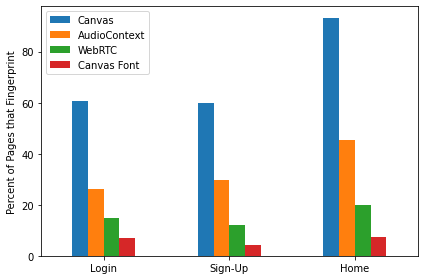

In [106]:
ax = fp_api_pct_df.plot.bar()
ax.set_ylabel("Percent of Pages that Fingerprint")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("api_count_by_page_type.png",
            format="png",
            bbox_inches="tight")
plt.savefig("plots/api_count_by_page_type.pdf",
            format="pdf",
            bbox_inches="tight")